# Setup

## Imports

In [1]:
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get the current directory of the notebook
notebook_path = os.path.abspath("")

# Find the Project Root (go up one level from 'notebooks')
# If the notebook is in 'notebooks/', this moves to the parent folder.
project_root = os.path.dirname(notebook_path)

# Check if 'src' exists here. If not, maybe we are already at root?
if not os.path.exists(os.path.join(project_root, 'src')):
    # Fallback: Assume we are already in the project root
    project_root = notebook_path

# Add to sys.path if not already there
if project_root not in sys.path:
    sys.path.append(project_root)

# DEBUGGING PRINT
print(f"Does 'src' exist here? {os.path.exists(os.path.join(project_root, 'src'))}")

Does 'src' exist here? True


In [3]:
from src.preprocessing import (
    filter_low_magnitude_genes,
    normalize_by_library_size,
    log_transform,
    normalize_data_with_pearson,
    genes
)
from src.visualization import (
    plot_gene_magnitude_distribution,
    plot_filtering_effect,
    plot_filtering_effect_violin,
    plot_normalization_comparison,
    plot_log_transform_comparison,
    plot_pearson_diagnostic
)
from src.utils import extract_gene_subset

## Data Loading

In [4]:
from src.data_loading import load_csv_data

DATA_PATH = '../data/E-MTAB-3321/raw/E-MTAB-3321.csv.gz'
raw_data = load_csv_data(DATA_PATH)

raw_data.shape

(124, 41480)

# Gene Filtering

In [5]:
clean_data = filter_low_magnitude_genes(raw_data)

clean_data.head()

  • Dropped 15973 low-magnitude genes


,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,ENSMUSG00000000088,ENSMUSG00000000093,...,ERCC-00154,ERCC-00157,ERCC-00158,ERCC-00160,ERCC-00162,ERCC-00163,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171
2cell_1_A,165,722,58,0,12,0,0,10,293,0,...,0,0,1,1,0,0,0,0,0,23
2cell_1_B,79,547,33,0,3,0,0,1,191,0,...,0,1,0,0,0,0,0,0,0,21
2cell_2_A,124,481,22,0,7,0,0,31,190,0,...,0,0,0,0,0,0,0,0,0,11
2cell_2_B,41,219,34,0,9,0,0,38,98,0,...,0,0,0,0,0,0,1,0,0,17
2cell_3_A,107,808,68,0,20,0,0,64,378,0,...,0,0,0,0,0,0,0,0,0,36


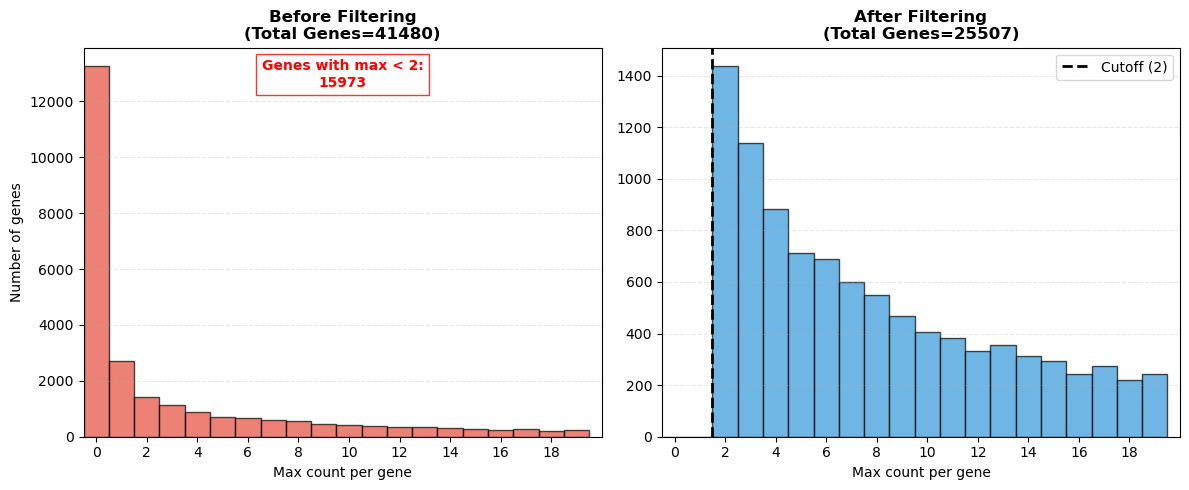

In [6]:
plot_gene_magnitude_distribution(raw_data, clean_data)

# Quality Control (Cell Filtering)

## Mitochondrial

In [7]:
# Check if any starts with "mt-" (Mouse)
print("'mt-' genes:", clean_data.columns.str.startswith('mt-').sum())

'mt-' genes: 0


## Apoptosis

In [8]:
apoptosis_data = extract_gene_subset(clean_data, genes.MOUSE_APOPTOSIS_GENES, "Apoptosis")

--- Apoptosis Summary ---
Total genes in dataset: 25507
Genes in target list:   161
Intersection found:     0
---------------------


## rRNA

In [9]:
rrna_data = extract_gene_subset(clean_data, genes.MOUSE_RRNA_GENES, "rRNA")

--- rRNA Summary ---
Total genes in dataset: 25507
Genes in target list:   219
Intersection found:     0
----------------


# Normalization

## logCPM

### Normalize by library size

In [10]:
normalized_data = normalize_by_library_size(clean_data)

normalized_data.shape

  • Normalizing library size (rescale=1e+06)


(124, 25507)

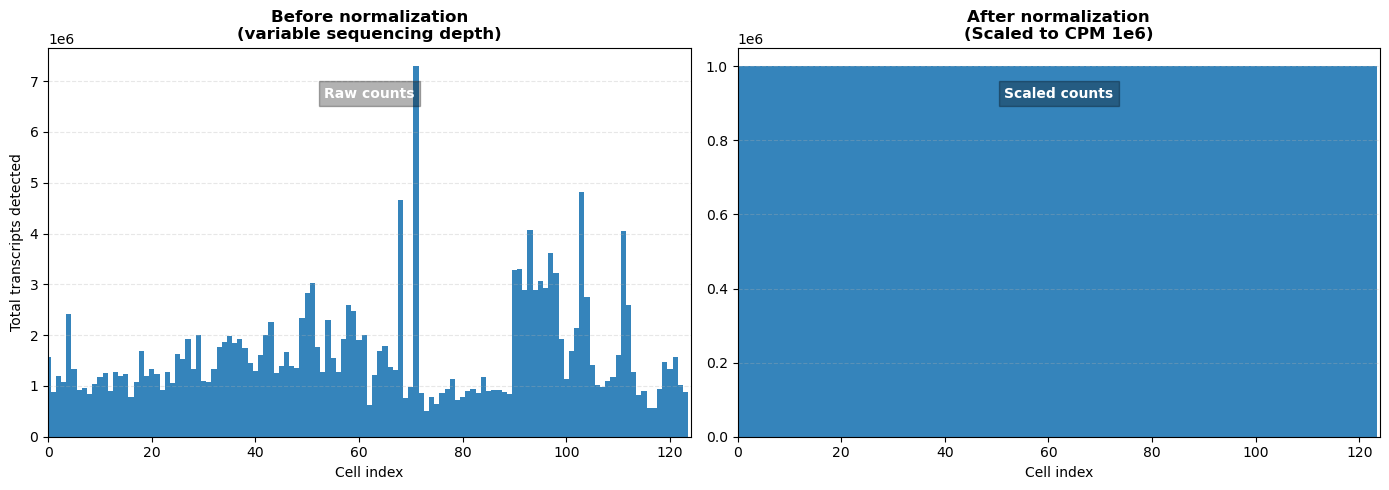

In [11]:
plot_normalization_comparison(clean_data, normalized_data, n_cells=124)

### Log Transform

In [12]:
logged_data = log_transform(normalized_data)

logged_data.shape

  • Applying log transform (log1+x)


(124, 25507)

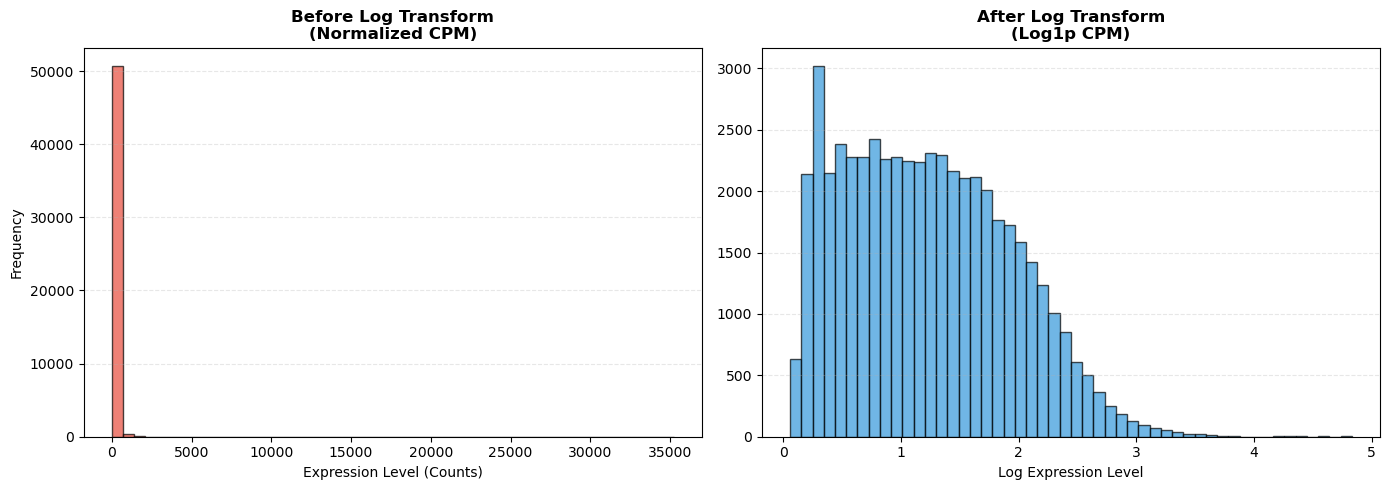

In [13]:
plot_log_transform_comparison(normalized_data, logged_data)

#### High Variable Genes

## Pearson residuals

In [14]:
pearsons_data = normalize_data_with_pearson(clean_data)

pearsons_data.shape

  • Computing residuals for 124 cells
  • Selecting top 3000 variable genes


(124, 3000)

In [15]:
pearsons_data.head()

,ENSMUSG00000000028,ENSMUSG00000000037,ENSMUSG00000000131,ENSMUSG00000000134,ENSMUSG00000000148,ENSMUSG00000000149,ENSMUSG00000000275,ENSMUSG00000000276,ENSMUSG00000000301,ENSMUSG00000000303,...,ERCC-00096,ERCC-00108,ERCC-00111,ERCC-00112,ERCC-00113,ERCC-00130,ERCC-00131,ERCC-00136,ERCC-00145,ERCC-00171
2cell_1_A,11.135529,8.008213,-0.972603,5.626137,2.306354,3.080063,2.449133,11.135529,-4.889151,-6.498521,...,-9.309008,-7.318519,-5.863515,-3.492160,-8.803715,-8.779632,-2.997633,-7.361514,-5.726487,-8.652612
2cell_1_B,11.135529,6.477712,-4.686533,0.268902,7.081409,-2.648970,-1.009066,11.135529,-2.155847,-5.550456,...,-8.690602,-6.308527,-4.836233,-2.666080,-8.252600,-8.238384,-2.271285,-6.664156,-4.602877,-7.829018
2cell_2_A,9.435843,1.860067,0.132256,-0.361900,3.447199,6.255383,2.086806,10.002372,-0.241126,-3.651427,...,-9.058685,-6.623434,-5.269975,-2.169964,-8.520627,-8.679750,-1.189405,-6.611660,-5.158868,-8.556444
2cell_2_B,0.295008,5.217120,6.984389,0.860490,0.909007,11.135529,-0.391095,11.135529,-3.887485,-5.099637,...,-9.251142,-6.771895,-5.278758,-2.971078,-8.437706,-8.547394,-1.800161,-6.626614,-2.075629,-8.318364
2cell_3_A,6.397247,5.979611,1.074202,1.213915,1.101495,7.845508,-5.340825,3.336894,-3.617989,-6.467485,...,-9.344341,-8.014986,-6.341393,-4.029289,-8.930479,-8.788268,-3.656737,-7.826524,-6.578276,-8.935916


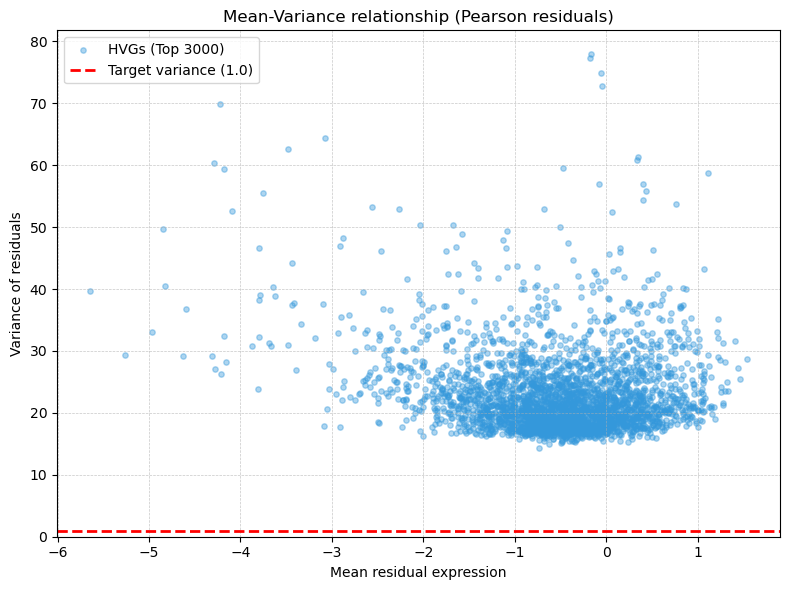

Mean variance: 22.95
Max variance:  77.92


In [16]:
plot_pearson_diagnostic(pearsons_data)